# Part 1: Import Dataset

In [ ]:
!pip install pandas numpy matplotlib seaborn networkx scikit-learn xgboost

In [ ]:
import pandas as pd
import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = "/content/drive/My Drive/"

file_path_1 = folder_path + "first_order_df.csv"
file_path_2 = folder_path + "transaction_dataset.csv"
file_path_3 = folder_path + "second_order_df.csv"
file_path_4 = folder_path + "addresses.csv"

import pandas as pd

df_first_order = pd.read_csv(file_path_1)
df_transaction = pd.read_csv(file_path_2)
df_second_order = pd.read_csv(file_path_3)
df_addresses = pd.read_csv(file_path_4)

print(df_first_order.info())
print(df_transaction.info())
print(df_second_order.info())
print(df_addresses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254973 entries, 0 to 254972
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   254973 non-null  int64  
 1   TxHash       254973 non-null  object 
 2   BlockHeight  254973 non-null  int64  
 3   TimeStamp    254973 non-null  int64  
 4   From         254973 non-null  object 
 5   To           254642 non-null  object 
 6   Value        254973 non-null  float64
 7   isError      254973 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 15.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                          

In [ ]:
df_combined = pd.concat([df_first_order, df_second_order], ignore_index=True)
df_combined.head()

Unnamed: 0                                             TxHash  BlockHeight  \
0           0  0xaca3850ba0080cf47b47f80e46da452f61bcbb5470d3...      5848095   
1           1  0x95681862f9778e49caecf603dd911d6ed57f7799d89d...      5848181   
2           2  0x716ae3961b50186a0bbc272cfcc4555662f7fe33550f...      5848716   
3           3  0xf397197b800d6cc055a4db265b5e9df3dd2aa745c813...      5849038   
4           4  0x7f8086011a32f128dba57fe06fc5f4a181d2f5401e5a...      5849437   

    TimeStamp                                        From  \
0  1529873859  0x16f209b5332a1b4fa5bf19497ca40154c5db2f85   
1  1529875104  0xe7e07e44ee315b5f2d076340b2b7a5cc9a4ee57b   
2  1529883192  0x002f0c8119c16d310342d869ca8bf6ace34d9c39   
3  1529887684  0x0681d8db095565fe8a346fa0277bffde9c0edbbf   
4  1529893144  0x002f0c8119c16d310342d869ca8bf6ace34d9c39   

                                           To     Value  isError  
0  0x002f0c8119c16d310342d869ca8bf6ace34d9c39  0.500000        0  
1  0x002f0c8119c16d310342d869ca8bf6ace34d9c39  0.001020        0  
2  0xe892875b87b94c44edf0e91ee9f49d0525fadd83  0.500390        0  
3  0x002f0c8119c16d310342d869ca8bf6ace34d9c39  0.817800        0  
4  0xe892875b87b94c44edf0e91ee9f49d0525fadd83  0.817506        0

In [ ]:
df_small = df_combined.head(10000)

G = nx.DiGraph()

for index, row in df_small.iterrows():
    sender = row["From"]
    receiver = row["To"]
    value = row["Value"]

    G.add_edge(sender, receiver, weight=value)

print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

Graph created with 5689 nodes and 6553 edges.


In [ ]:
degree_centrality = nx.degree_centrality(G)

df_degree_centrality = pd.DataFrame({
    "Address": list(degree_centrality.keys()),
    "Degree Centrality": list(degree_centrality.values())
}).sort_values(by="Degree Centrality", ascending=False)

df_degree_centrality.head()

Address  Degree Centrality
4341  0x21f74c6bbc1e3ab9f0205e12de3a9daa14351aed           0.181786
1788  0x0fa3202e9f247f9349352c4296d2bbd6c7fa11b4           0.043425
3853  0x1ee6b25a0e3f855a10916766df3a056e924e5dce           0.035162
2410  0x1451dbe4304a60b5b25b4d98b355effd440417af           0.031294
3376  0x1d50588c0aa11959a5c28831ce3dc5f1d3120d29           0.031118

from matplotlib import pyplot as plt
_df_0['Degree Centrality'].plot(kind='hist', bins=20, title='Degree Centrality')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Address').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Degree Centrality'].plot(kind='line', figsize=(8, 4), title='Degree Centrality')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Address'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Degree Centrality', y='Address', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

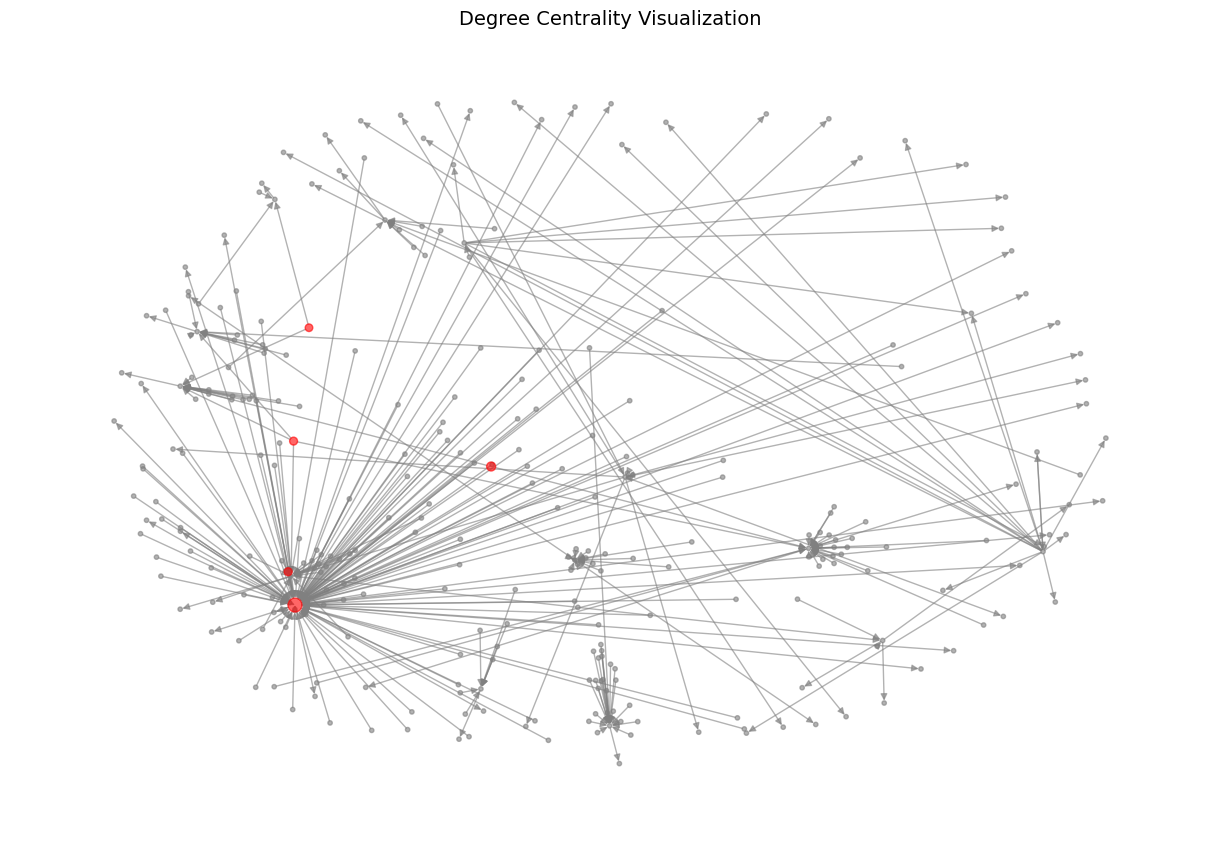

In [ ]:
import matplotlib.pyplot as plt

# Extract top 50 most active wallets
top_addresses = df_degree_centrality["Address"].head(50).tolist()

# Get subgraph of first 300 nodes
subgraph_nodes = list(G.nodes())[:300]
subgraph = G.subgraph(subgraph_nodes)

# Compute positions
pos = nx.spring_layout(subgraph, seed=42)

# **Fix node_size and node_color to match subgraph**
node_size = [degree_centrality[node] * 5000 if node in top_addresses else 10 for node in subgraph.nodes()]
node_color = ["red" if node in top_addresses else "gray" for node in subgraph.nodes()]

# Plot graph
plt.figure(figsize=(12, 8))
nx.draw(subgraph, pos, node_size=node_size, node_color=node_color, edge_color="gray", alpha=0.6, with_labels=False)

plt.title("Degree Centrality Visualization", fontsize=14)
plt.axis("off")
plt.show()


In [ ]:
# Compute PageRank
pagerank_scores = nx.pagerank(G, alpha=0.85)

# Convert to DataFrame
df_pagerank = pd.DataFrame({
    "Address": list(pagerank_scores.keys()),
    "PageRank Score": list(pagerank_scores.values())
}).sort_values(by="PageRank Score", ascending=False)

# Show Top 10 Influential Wallets
print(df_pagerank.head(10))


                                         Address  PageRank Score
4341  0x21f74c6bbc1e3ab9f0205e12de3a9daa14351aed        0.033035
3376  0x1d50588c0aa11959a5c28831ce3dc5f1d3120d29        0.012517
1172  0x0ae775637e63fa95855246fd82e96802d05883fc        0.011903
3552  0x68ca85dbf8eba69fb70ecdb78e0895f7cd94da83        0.010717
3853  0x1ee6b25a0e3f855a10916766df3a056e924e5dce        0.010252
1788  0x0fa3202e9f247f9349352c4296d2bbd6c7fa11b4        0.010044
3999  0xafd37cf1346798307cd0f9433f8af61da1241f97        0.007307
516   0x05dd62c007cde143b402fa5da3937c40c70b4b14        0.007096
1303  0xcd81af8a92c1e784c7ff1c47f20a75fb67c3a3a0        0.006613
6     0x0059b14e35dab1b4eee1e2926c7a5660da66f747        0.006323


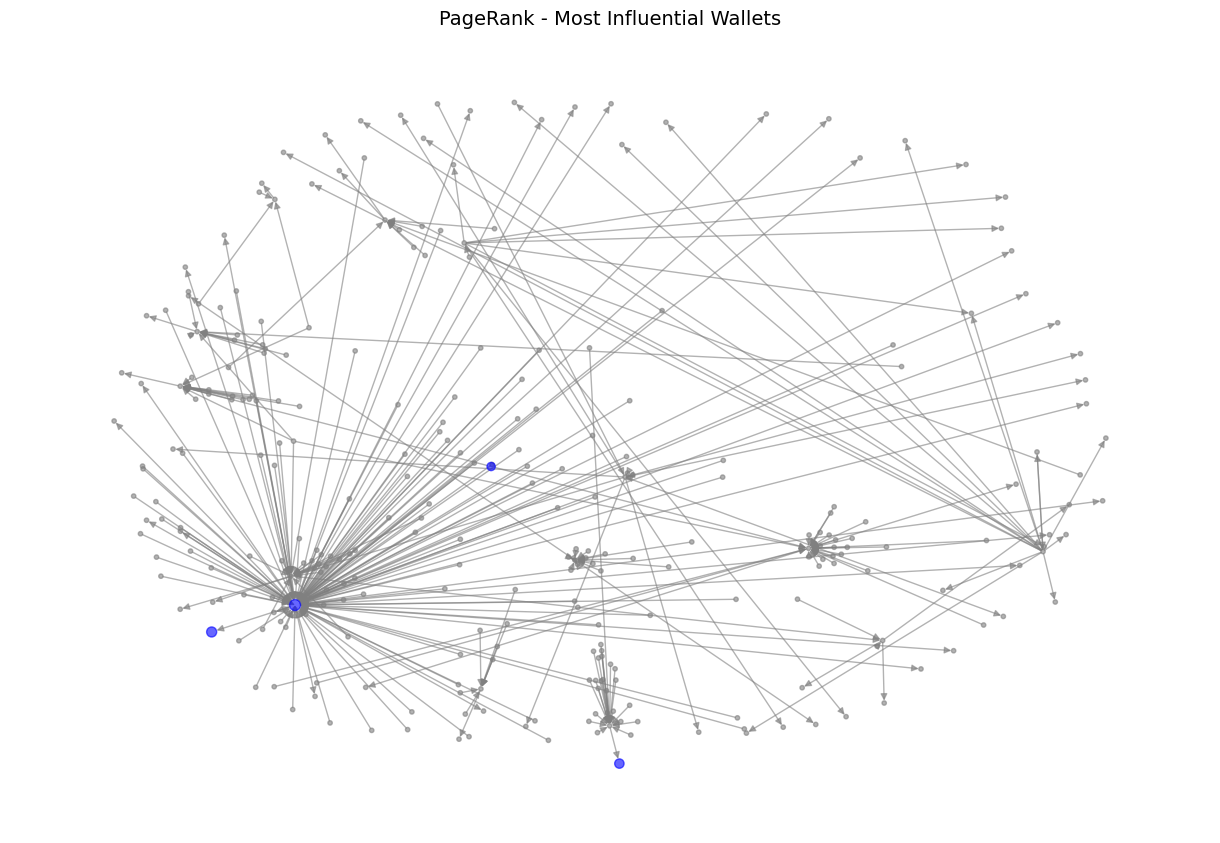

In [ ]:
# Extract top 50 most influential wallets
top_pagerank_addresses = df_pagerank["Address"].head(50).tolist()

# Get subgraph of first 300 nodes
subgraph_nodes = list(G.nodes())[:300]
subgraph = G.subgraph(subgraph_nodes)

# Compute positions
pos = nx.spring_layout(subgraph, seed=42)

# Fix node_size & node_color
node_size = [pagerank_scores[node] * 10000 if node in top_pagerank_addresses else 10 for node in subgraph.nodes()]
node_color = ["blue" if node in top_pagerank_addresses else "gray" for node in subgraph.nodes()]

# Plot Graph
plt.figure(figsize=(12, 8))
nx.draw(subgraph, pos, node_size=node_size, node_color=node_color, edge_color="gray", alpha=0.6, with_labels=False)

plt.title("PageRank - Most Influential Wallets", fontsize=14)
plt.axis("off")
plt.show()


In [ ]:
# High Activity Wallets

# Define threshold (top 1% most active wallets)
threshold = df_degree_centrality["Degree Centrality"].quantile(0.99)

# Flag suspicious wallets
suspicious_wallets = df_degree_centrality[df_degree_centrality["Degree Centrality"] > threshold]

print("🚨 Potential Fraudulent Wallets 🚨")
print(suspicious_wallets)


🚨 Potential Fraudulent Wallets 🚨
                                         Address  Degree Centrality
4341  0x21f74c6bbc1e3ab9f0205e12de3a9daa14351aed           0.181786
1788  0x0fa3202e9f247f9349352c4296d2bbd6c7fa11b4           0.043425
3853  0x1ee6b25a0e3f855a10916766df3a056e924e5dce           0.035162
2410  0x1451dbe4304a60b5b25b4d98b355effd440417af           0.031294
3376  0x1d50588c0aa11959a5c28831ce3dc5f1d3120d29           0.031118
730   0x062263af47ffa76f1b4b5c3aa0ef2b62ade436ea           0.028657
2246  0x25ab0a13f42ea870879b4b631d5599ef47260dc1           0.027954
1172  0x0ae775637e63fa95855246fd82e96802d05883fc           0.024789
419   0x0591a42188996397fc7cd6db729045146c37696c           0.020570
6     0x0059b14e35dab1b4eee1e2926c7a5660da66f747           0.020394
2239  0x13098fdefba2129b8873bcff5c9ce2de1cf7f32f           0.018812
516   0x05dd62c007cde143b402fa5da3937c40c70b4b14           0.018636
2001  0x1086feeb031e45e8fcd770662aa8302d7c23ba1f           0.018284
1010  0x0a5650a

In [ ]:
# Wallets that only send money

# Get node in-degree & out-degree
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Find wallets that ONLY send transactions
zero_incoming = [node for node in G.nodes() if in_degrees[node] == 0 and out_degrees[node] > 10]

print("🚨 Wallets That Only Send Transactions 🚨")
print(zero_incoming[:10])  # Show first 10


🚨 Wallets That Only Send Transactions 🚨
['0x0681d8db095565fe8a346fa0277bffde9c0edbbf', '0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98', '0x51836a753e344257b361519e948ffcaf5fb8d521', '0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0', '0x2b5634c42055806a59e9107ed44d43c426e58258', '0x390de26d772d2e2005c6d1d24afc902bae37a4bb', '0x75e7f640bf6968b6f32c47a3cd82c3c2c9dcae68', '0x564286362092d8e7936f0549571a803b203aaced', '0xd551234ae421e3bcba99a0da6d736074f22192ff', '0x32be343b94f860124dc4fee278fdcbd38c102d88']


In [ ]:
# Rank wallets based on their importance in the transaction flow

# Compute PageRank
pagerank_scores = nx.pagerank(G, alpha=0.85)

# Convert to DataFrame
df_pagerank = pd.DataFrame({
    "Address": list(pagerank_scores.keys()),
    "PageRank Score": list(pagerank_scores.values())
}).sort_values(by="PageRank Score", ascending=False)

# Show Top 10 Influential Wallets
print("🔹 Top 10 Most Influential Wallets by PageRank:")
print(df_pagerank.head(10))


🔹 Top 10 Most Influential Wallets by PageRank:
                                         Address  PageRank Score
4341  0x21f74c6bbc1e3ab9f0205e12de3a9daa14351aed        0.033035
3376  0x1d50588c0aa11959a5c28831ce3dc5f1d3120d29        0.012517
1172  0x0ae775637e63fa95855246fd82e96802d05883fc        0.011903
3552  0x68ca85dbf8eba69fb70ecdb78e0895f7cd94da83        0.010717
3853  0x1ee6b25a0e3f855a10916766df3a056e924e5dce        0.010252
1788  0x0fa3202e9f247f9349352c4296d2bbd6c7fa11b4        0.010044
3999  0xafd37cf1346798307cd0f9433f8af61da1241f97        0.007307
516   0x05dd62c007cde143b402fa5da3937c40c70b4b14        0.007096
1303  0xcd81af8a92c1e784c7ff1c47f20a75fb67c3a3a0        0.006613
6     0x0059b14e35dab1b4eee1e2926c7a5660da66f747        0.006323


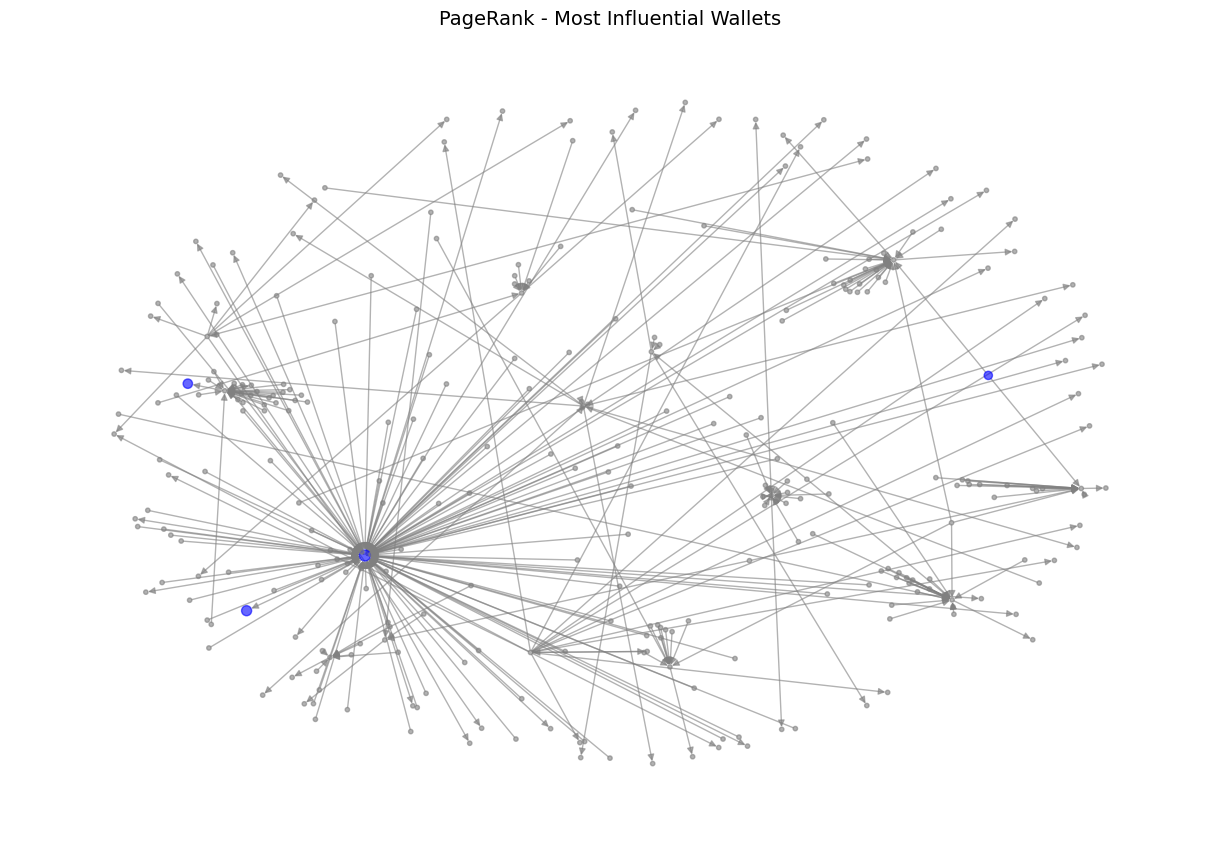

In [ ]:
# Extract top 50 most influential wallets
top_pagerank_addresses = df_pagerank["Address"].head(50).tolist()

# Get subgraph of first 300 nodes
subgraph_nodes = list(G.nodes())[:300]
subgraph = G.subgraph(subgraph_nodes)

# Compute positions
pos = nx.spring_layout(subgraph, seed=42)

# Fix node_size & node_color
node_size = [pagerank_scores[node] * 10000 if node in top_pagerank_addresses else 10 for node in subgraph.nodes()]
node_color = ["blue" if node in top_pagerank_addresses else "gray" for node in subgraph.nodes()]

# Plot Graph
plt.figure(figsize=(12, 8))
nx.draw(subgraph, pos, node_size=node_size, node_color=node_color, edge_color="gray", alpha=0.6, with_labels=False)

plt.title("PageRank - Most Influential Wallets", fontsize=14)
plt.axis("off")
plt.show()

In [ ]:
# Compute the threshold for the top 1% most active wallets
threshold = df_degree_centrality["Degree Centrality"].quantile(0.99)

# Identify suspicious wallets exceeding the threshold
suspicious_wallets = df_degree_centrality[df_degree_centrality["Degree Centrality"] > threshold]

# Display the top 10 suspicious wallets
print("🚨 Highly Active Suspicious Wallets 🚨")
print(suspicious_wallets.head(10))


🚨 Highly Active Suspicious Wallets 🚨
                                         Address  Degree Centrality
4341  0x21f74c6bbc1e3ab9f0205e12de3a9daa14351aed           0.181786
1788  0x0fa3202e9f247f9349352c4296d2bbd6c7fa11b4           0.043425
3853  0x1ee6b25a0e3f855a10916766df3a056e924e5dce           0.035162
2410  0x1451dbe4304a60b5b25b4d98b355effd440417af           0.031294
3376  0x1d50588c0aa11959a5c28831ce3dc5f1d3120d29           0.031118
730   0x062263af47ffa76f1b4b5c3aa0ef2b62ade436ea           0.028657
2246  0x25ab0a13f42ea870879b4b631d5599ef47260dc1           0.027954
1172  0x0ae775637e63fa95855246fd82e96802d05883fc           0.024789
419   0x0591a42188996397fc7cd6db729045146c37696c           0.020570
6     0x0059b14e35dab1b4eee1e2926c7a5660da66f747           0.020394


In [ ]:
# Wallets that only send but never receive

# Compute in-degree and out-degree for each node
in_degrees = dict(G.in_degree())  # Incoming transactions
out_degrees = dict(G.out_degree())  # Outgoing transactions

# Find wallets that only send transactions but never receive
zero_incoming = [node for node in G.nodes() if in_degrees[node] == 0 and out_degrees[node] > 10]

# Display the first 10 results
print("🚨 Suspicious Wallets That Only Send Transactions 🚨")
print(zero_incoming[:10])


🚨 Suspicious Wallets That Only Send Transactions 🚨
['0x0681d8db095565fe8a346fa0277bffde9c0edbbf', '0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98', '0x51836a753e344257b361519e948ffcaf5fb8d521', '0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0', '0x2b5634c42055806a59e9107ed44d43c426e58258', '0x390de26d772d2e2005c6d1d24afc902bae37a4bb', '0x75e7f640bf6968b6f32c47a3cd82c3c2c9dcae68', '0x564286362092d8e7936f0549571a803b203aaced', '0xd551234ae421e3bcba99a0da6d736074f22192ff', '0x32be343b94f860124dc4fee278fdcbd38c102d88']


# Part 2: Graph Construction

In [ ]:
!pip install python-louvain
import community.community_louvain as community

In [ ]:
# Louvain Community Detection - Identify clusters of wallets that are closely connected
import networkx as nx
from collections import Counter

# Convert directed graph to undirected for community detection
undirected_G = G.to_undirected()

# Perform Louvain community detection
partition = community.best_partition(undirected_G)

# Add community labels to the nodes
nx.set_node_attributes(G, partition, "community")

# Count number of nodes in each community
community_sizes = Counter(partition.values())

# Display the largest communities
print("🚨 Top 5 largest detected communities 🚨")
print(community_sizes.most_common(5))


🚨 Top 5 largest detected communities 🚨
[(118, 1010), (282, 241), (41, 230), (560, 192), (549, 177)]


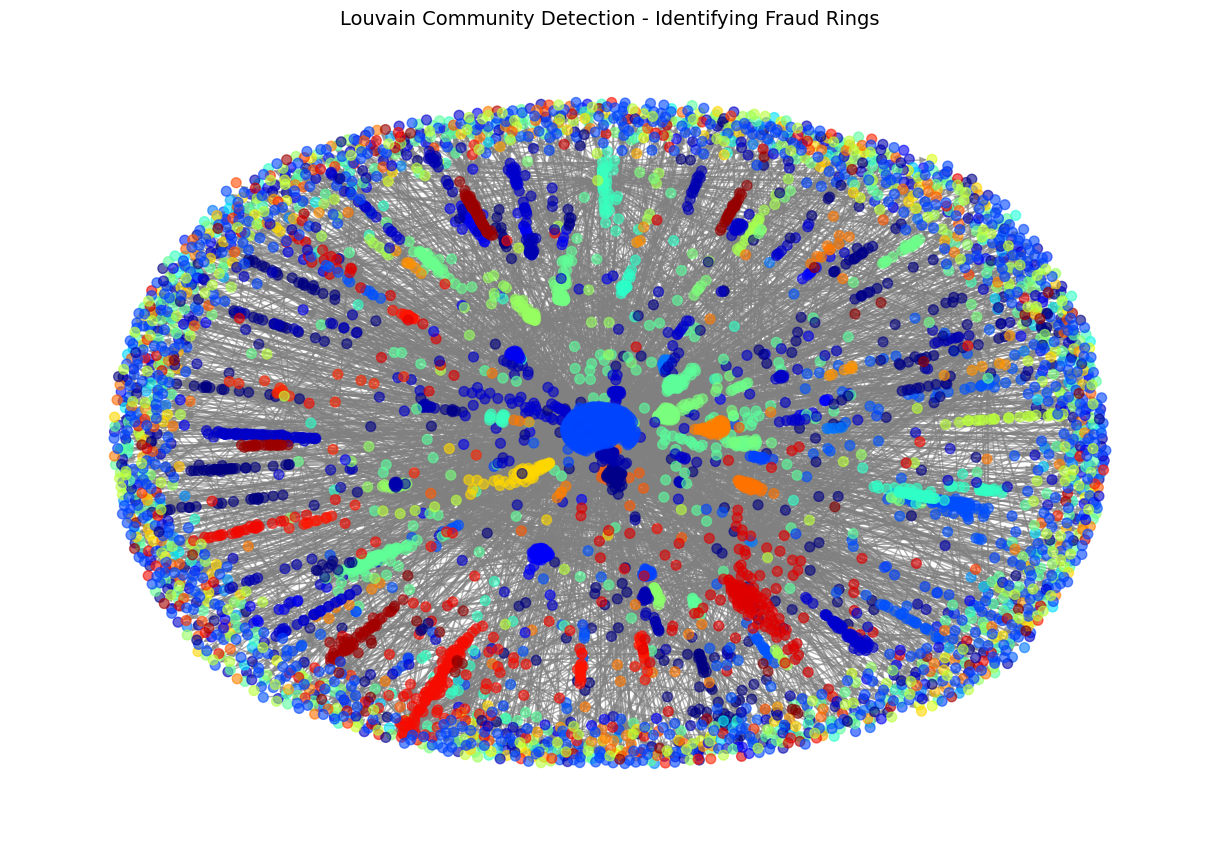

In [ ]:
# Extract unique community IDs
communities = set(partition.values())

# Assign colors to communities
community_colors = {comm: plt.cm.jet(i / len(communities)) for i, comm in enumerate(communities)}

# Define node colors based on their community
node_color = [community_colors[partition[node]] for node in G.nodes()]

# Draw the network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Fix layout for consistency
nx.draw(G, pos, node_color=node_color, edge_color="gray", node_size=50, alpha=0.6, with_labels=False)

# Add title
plt.title("Louvain Community Detection - Identifying Fraud Rings", fontsize=14)
plt.axis("off")
plt.show()

# Part 3: Behavior-based Detection

In [ ]:
# Identify the largest fraud rings
top_communities = sorted(set(partition.values()), key=lambda x: list(partition.values()).count(x), reverse=True)[:5]

# Get addresses in the largest communities
suspicious_addresses = {node for node, comm in partition.items() if comm in top_communities}

print(f"Top 5 largest fraud rings contain {len(suspicious_addresses)} suspicious wallets.")


Top 5 largest fraud rings contain 1850 suspicious wallets.


In [ ]:
# Filter transactions involving suspicious addresses
df_suspicious = df_combined[(df_combined["From"].isin(suspicious_addresses)) | (df_combined["To"].isin(suspicious_addresses))]

print(f"Number of suspicious transactions: {len(df_suspicious)}")


Number of suspicious transactions: 260040


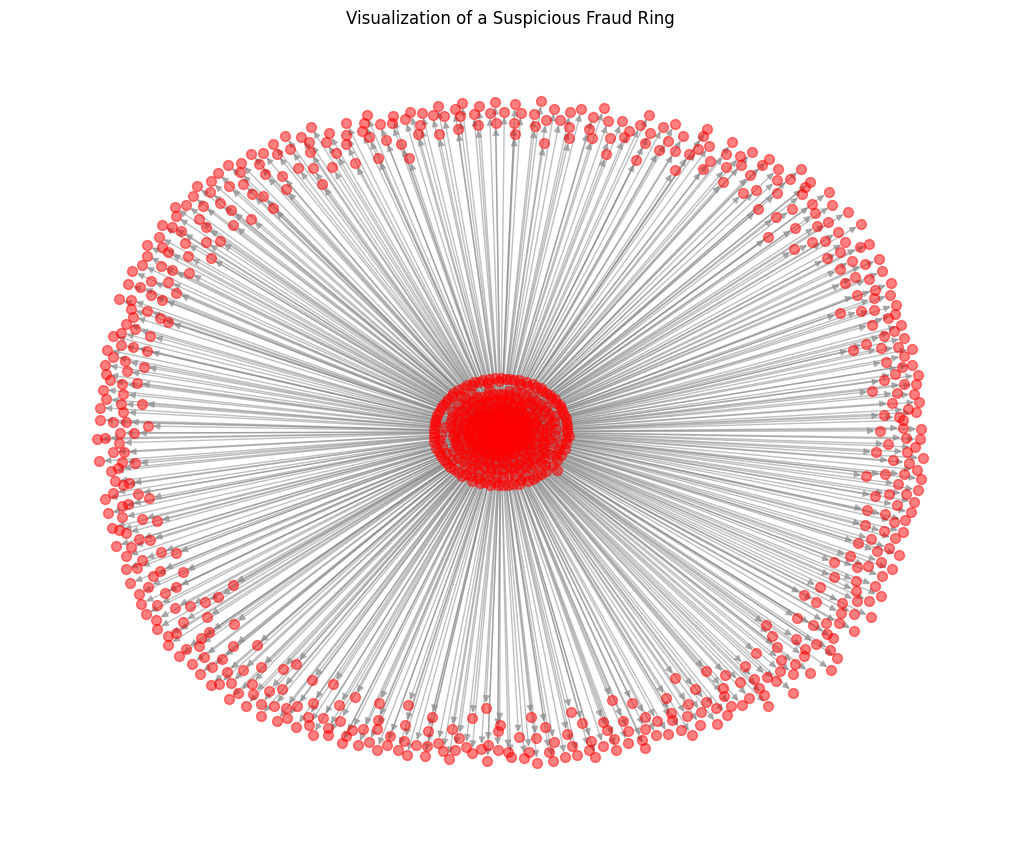

In [ ]:
# Identify key fraud wallets to understand transaction flows and detect patterns in scam behavior

# Select a fraud ring (first in the list)
selected_community = top_communities[0]
fraud_ring_nodes = {node for node, comm in partition.items() if comm == selected_community}
subG = G.subgraph(fraud_ring_nodes)

# Plot
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(subG, seed=42)
nx.draw(subG, pos, node_size=50, node_color="red", edge_color="gray", alpha=0.5)
plt.title("Visualization of a Suspicious Fraud Ring")
plt.show()

# The cluster is extremely dense, including a main orchestrator or a few key addresses coordinating the fraud.


In [ ]:
# Extract the top 5 most central wallets in the fraud ring

# Identify the most connected wallets in the fraud ring
top_wallets = sorted(fraud_ring_nodes, key=lambda x: G.degree(x), reverse=True)[:5]

print("Top 5 most connected wallets in this fraud ring:")
print(top_wallets)


Top 5 most connected wallets in this fraud ring:
['0x21f74c6bbc1e3ab9f0205e12de3a9daa14351aed', '0x1fd6267f0d86f62d88172b998390afee2a1f54b6', '0x075fdd72c9fae875c6394a0c2497ec1f3913007d', '0x1151314c646ce4e0efd76d1af4760ae66a9fe30f', '0x24f21c22f0e641e2371f04a7bb8d713f89f53550']


In [ ]:
# How money moves

# Filter transactions related to the most connected wallets
df_money_flow = df_combined[df_combined["From"].isin(top_wallets) | df_combined["To"].isin(top_wallets)]

print(f"Number of transactions involving the top orchestrators: {len(df_money_flow)}")


Number of transactions involving the top orchestrators: 34439


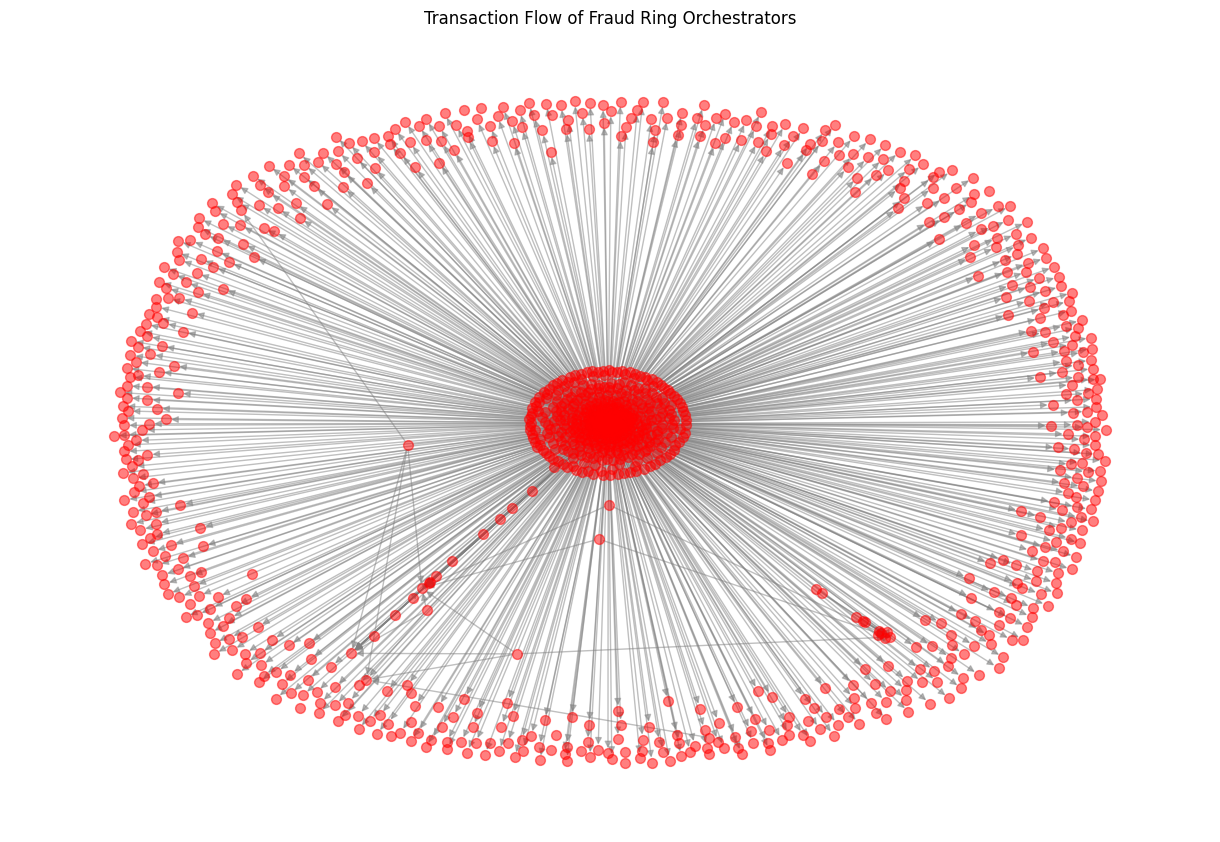

In [ ]:
# Extract subgraph of transactions involving the top orchestrators
G_sub = G.subgraph(set(df_money_flow["From"]).union(set(df_money_flow["To"])))

# Plot the transaction network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_sub, seed=42)
nx.draw(G_sub, pos, node_size=50, node_color="red", edge_color="gray", alpha=0.5, with_labels=False)
plt.title("Transaction Flow of Fraud Ring Orchestrators")
plt.show()

In [ ]:
# Check where the money goes

# Find out where the top orchestrators are sending money
outgoing_transactions = df_combined[df_combined["From"].isin(top_wallets)]
top_recipients = outgoing_transactions["To"].value_counts().head(10)

print("Top 10 recipient wallets of fraud orchestrators:")
print(top_recipients)

Top 10 recipient wallets of fraud orchestrators:
To
0xcafb10ee663f465f9d10588ac44ed20ed608c11e    5455
0xf4b51b14b9ee30dc37ec970b50a486f37686e2a8    2101
0x69b83d0f391877e1f026ca75af4426ef93cf7865    1646
0x94e17901b6dfae329c63edd59447e2882e55aca6    1638
0x957cd4ff9b3894fc78b5134a8dc72b032ffbc464    1514
0x73e08d9b97a703fe07bf666efea1d79824abccf4     372
0x435891f5515ba3a5fe0e3f048f769ab7a0d30ea4     351
0x21f74c6bbc1e3ab9f0205e12de3a9daa14351aed     242
0x0dc96e8356d7fb4dc03c0fa5392a5b1028e7fc5c     220
0xe2bb2a43fccfdc868e82a304e28660a022ea5078     190
Name: count, dtype: int64


In [ ]:
# Check if orchestrators send funds back to themselves
cyclical_transactions = df_combined[(df_combined["From"].isin(top_wallets)) & (df_combined["To"].isin(top_wallets))]

print(f"Number of cyclical transactions: {len(cyclical_transactions)}")


Number of cyclical transactions: 346


In [ ]:
# Generate Risk Scores

df_risk = df_combined[df_combined["From"].isin(top_wallets)]
df_risk["Risk Score"] = df_risk["Value"] * df_risk["To"].map(lambda x:1 if x in top_wallets else 0.5)

print(df_risk.head(10))

      Unnamed: 0                                             TxHash  \
1690        1690  0xa3db724e86ab5cf63e937125feeb769d08c03e430896...   
1746        1746  0x01540312315a6e3bc016f82580708f1adc1324e20f58...   
7036        7036  0x8bd0c162c45b98217ae189b075458223bd6431624c55...   
7476        7476  0xf3d25f6e4b44e0b79efc6e20b94e0cdba4841ce374f7...   
7477        7477  0xb322a33fe06a78ab7459970329e0c1604cebf5292ced...   
7780        7780  0x285d285c1a44323b9c96362cd4e856f4de3c1a991540...   
7781        7781  0xb7e99136e417931462cbf34b70ce8d3328d170e6d51a...   
7783        7783  0xf1be41a06019eedecd1c92fb6786c54ba354c53c80bd...   
7785        7785  0xa56516a990c141ee72b53baf151f475337ff70d3044e...   
7787        7787  0xc82c603636b5deed4f369ba2eeacfdf253619bc1e392...   

      BlockHeight   TimeStamp                                        From  \
1690      4508554  1510074156  0x1151314c646ce4e0efd76d1af4760ae66a9fe30f   
1746      4520705  1510242297  0x1151314c646ce4e0efd76d1af4760ae

<ipython-input-26-33f1cdb683ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_risk["Risk Score"] = df_risk["Value"] * df_risk["To"].map(lambda x:1 if x in top_wallets else 0.5)


In [ ]:
# Identify Final Destinations

# Find transactions where recipient wallets do not send funds further
final_destinations = df_combined[~df_combined["To"].isin(df_combined["From"])]

# Count occurrences of each final recipient
top_final_destinations = final_destinations["To"].value_counts().head(10)

print("Top 10 final recipient wallets:")
print(top_final_destinations)


Top 10 final recipient wallets:
To
0xb5e5585d0057501c91c48094029a6f4fb10b5a01    75117
0x1b75b90e60070d37cfa9d87affd124bb345bf70a    59320
0xe75509810e09b04eef4ebd0b471bacf5530b162e    35114
0xa66d83716c7cfe425b44d0f7ef92de263468fb3d    34628
0x741fc999f5b62c80831cf659aed04c64ac8ef24e    25944
0xc22462d4bc50952b061c9e6c585fdd9a04d0d75a    25834
0x9ca4c6063c00f36304c09c6b3961e7fbd53a4c8b    24117
0x49edf201c1e139282643d5e7c6fb0c7219ad1db7    23148
0x12444b6ec62e616ebc8a23e56e61f8f4c6da610c    22342
0x31c8772dc63a3c63bbdd754a77b1b39331485df0    19031
Name: count, dtype: int64


In [ ]:
# List of known exchange deposit addresses (Manually curated)
exchange_addresses = [
    "0x742d35cc6634c0532925a3b844bc454e4438f44e",  # Binance
    "0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0",  # Kraken
    "0xf977814e90da44bfa03b6295a0616a897441acec"   # Huobi
]

# Find transactions where recipients are known exchanges
exchange_transactions = df_combined[df_combined["To"].isin(exchange_addresses)]

print(f"Number of transactions leading to exchanges: {len(exchange_transactions)}")
print(exchange_transactions.head(10))


Number of transactions leading to exchanges: 59
         Unnamed: 0                                             TxHash  \
882234       627261  0x3f94698f39fa3b1e75af469e705b4c5c6f1bd8c21033...   
2426894     2171921  0x13fb0db6f4dcbbe678e05203620bc64b7bbe7794e3dc...   
2458523     2203550  0xd9f4a4cc59cf8b503c9bfab9efdf98705b0851838db1...   
2458524     2203551  0xde1e2cd0342749121dc382158a587f36c36224b88209...   
2647313     2392340  0xd9f4a4cc59cf8b503c9bfab9efdf98705b0851838db1...   
2647314     2392341  0xde1e2cd0342749121dc382158a587f36c36224b88209...   
2754161     2499188  0x13fb0db6f4dcbbe678e05203620bc64b7bbe7794e3dc...   
2841466     2586493  0x83eea120b044a74d92fd41eeebac357559e07e93c0a4...   
2890002     2635029  0xd9f4a4cc59cf8b503c9bfab9efdf98705b0851838db1...   
2890003     2635030  0xde1e2cd0342749121dc382158a587f36c36224b88209...   

         BlockHeight   TimeStamp                                        From  \
882234       4695057  1512712123  0xc49e71b3f1cf4f6bdfddb

In [ ]:
# Detecting Transfers to Mixers

# List of known mixers (Can be expanded with OSINT sources)
mixer_addresses = [
    "0xe93381fb4c4f14bda253907b18fad305d799241a",  # Tornado Cash
    "0x5878b24fa18efc2952ad79ecaf2fa8b5f9158c59"   # ChipMixer
]

# Find transactions leading to mixers
mixer_transactions = df_combined[df_combined["To"].isin(mixer_addresses)]

print(f"Number of transactions leading to mixers: {len(mixer_transactions)}")
print(mixer_transactions.head(10))


Number of transactions leading to mixers: 6
         Unnamed: 0                                             TxHash  \
3951701     3696728  0x9f5b16ed68c73f6cdd0f17ff8788ed38ab1d29f0038f...   
6382818     6127845  0x9f5b16ed68c73f6cdd0f17ff8788ed38ab1d29f0038f...   
6390896     6135923  0x0453dcdfce9c6c655147f3d643e49d4e6e085799042a...   
6390901     6135928  0xccb4f628617d48bacf148a956cca7f687000d9360509...   
6855342     6600369  0x569efb02d12d2a203a1e7b0aee8869fa74f3b238b328...   
6855380     6600407  0x73b4ab9b2a575583ebc1b3d47a738cfd3538e03f6c33...   

         BlockHeight   TimeStamp                                        From  \
3951701      5661449  1527053700  0x6af85a4818400a4de9b5702baa60b172f631506a   
6382818      5661449  1527053700  0x6af85a4818400a4de9b5702baa60b172f631506a   
6390896      4885410  1515590058  0xa91183d7dfcfe39d923071f5527552ab52da6d44   
6390901      5010205  1517469021  0xa91183d7dfcfe39d923071f5527552ab52da6d44   
6855342      8394497  1566402079  0xe

In [ ]:
# Creating feature set
df_features = df_combined.copy()

# Transaction behavior
df_features["num_sent"] = df_features.groupby("From")["TxHash"].transform("count")
df_features["num_received"] = df_features.groupby("To")["TxHash"].transform("count")
df_features["unique_recipients"] = df_features.groupby("From")["To"].transform("nunique")
df_features["unique_senders"] = df_features.groupby("To")["From"].transform("nunique")

# Network features (precomputed from graph)
df_features["degree_centrality"] = df_features["From"].map(degree_centrality)
df_features["betweenness_centrality"] = df_features["From"].map(betweenness_centrality)

# Risk indicators
df_features["is_orchestrator"] = df_features["From"].apply(lambda x: 1 if x in top_orchestrators else 0)
df_features["is_mixer"] = df_features["To"].apply(lambda x: 1 if x in mixer_addresses else 0)
df_features["is_exchange"] = df_features["To"].apply(lambda x: 1 if x in exchange_addresses else 0)

# Define target label (1 for flagged fraudulent transactions, 0 for normal transactions)
df_features["is_fraud"] = df_features["From"].apply(lambda x: 1 if x in fraud_wallets else 0)

# Save dataset for ML
df_features.to_csv("fraud_detection_dataset.csv", index=False)

print("Feature extraction completed!")


NameError: name 'betweenness_centrality' is not defined

## Mixer-like Behavior
Focus on pattern where:


*   A wallet recieves mant small transactions
*   Quickly sends funds to many other wallets

This mimics how mixer anonymize funds by pooling and then redistributing.



In [ ]:
# Detect Candidate Mixer Wallet

# Step 1: Find wallets with high fan-in of small transactions
fan_in_df = df_combined[df_combined['Value'] < 1]  # Define 'small' as <1 ETH
incoming_counts = fan_in_df.groupby('To').size()
potential_mixers = incoming_counts[incoming_counts > 10].index.tolist()

# Step 2: Of those, check if they also have high fan-out
fan_out_df = df_combined[df_combined['From'].isin(potential_mixers)]
fan_out_counts = fan_out_df.groupby('From')['To'].nunique()
final_mixers = fan_out_counts[fan_out_counts > 10].index.tolist()

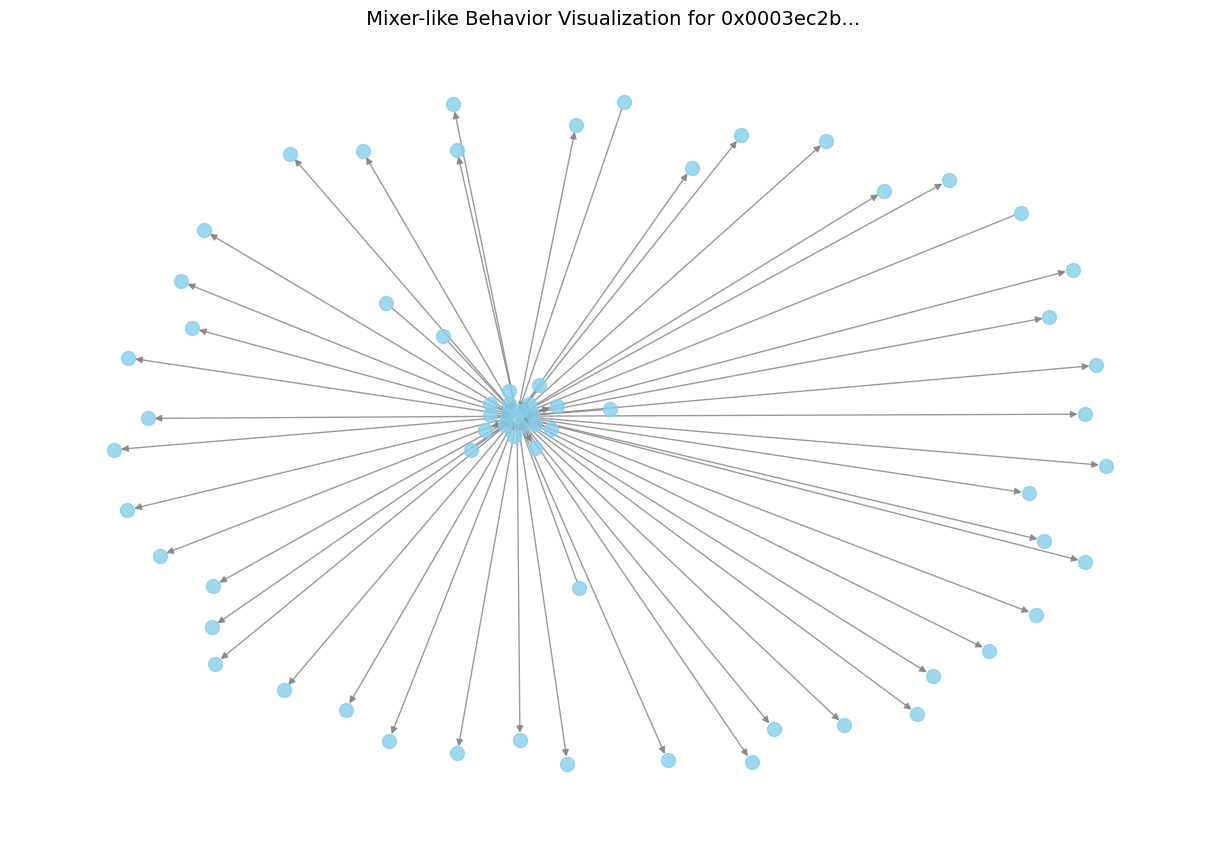

In [ ]:
# Choose one mixer-like wallet
mixer_wallet = final_mixers[0]

# Extract relevant transactions
mixer_transactions = df_combined[
    (df_combined['From'] == mixer_wallet) | (df_combined['To'] == mixer_wallet)
]

# Build a directed graph
G_mixer = nx.DiGraph()

# Add edges
for _, row in mixer_transactions.iterrows():
    G_mixer.add_edge(row['From'], row['To'], weight=row['Value'])

# Visualize the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_mixer, seed=42)
nx.draw(G_mixer, pos,
        with_labels=False,
        node_size=100,
        edge_color='gray',
        node_color='skyblue',
        alpha=0.8)
plt.title(f" Mixer-like Behavior Visualization for {mixer_wallet[:10]}...", fontsize=14)
plt.axis("off")
plt.show()

## Cyclical Transactions

In [ ]:
# Get unique wallets involved in cycles
cyclical_wallets = set(cyclical_transactions['From']).union(cyclical_transactions['To'])

# Filter original dataset for all transactions between these wallets
cycle_subgraph_df = df_combined[
    df_combined['From'].isin(cyclical_wallets) & df_combined['To'].isin(cyclical_wallets)
]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


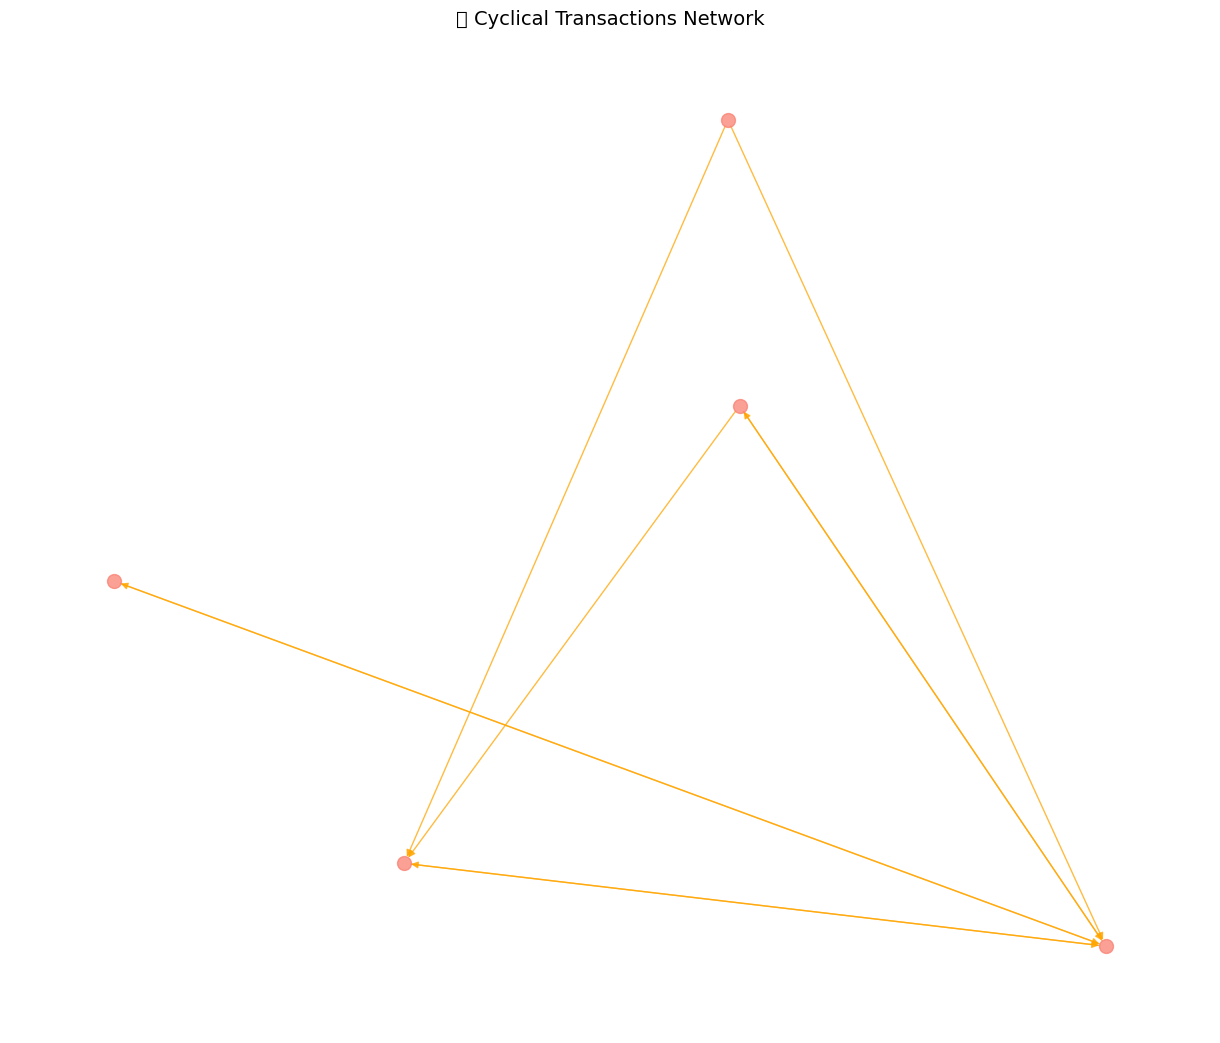

In [ ]:
# Create a directed graph from cyclical transactions
G_cycle = nx.DiGraph()
for _, row in cycle_subgraph_df.iterrows():
    G_cycle.add_edge(row['From'], row['To'], weight=row['Value'])

# Visualize cycle network
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_cycle, seed=42)
nx.draw(G_cycle, pos,
        with_labels=False,
        node_size=100,
        edge_color='orange',
        node_color='salmon',
        alpha=0.75)
plt.title("Cyclical Transactions Network", fontsize=14)
plt.axis("off")
plt.show()